<a href="https://colab.research.google.com/github/Hemanthpusa/Deep-Learning/blob/main/neuralnet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
wine= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
not_good= wine['quality']<=5
is_good= wine['quality']>5
print(not_good.value_counts())
print(is_good.value_counts())
wine['quality'][not_good]=0
wine['quality'][is_good]=1
wine['quality'].value_counts()
print(wine)

False    855
True     744
Name: quality, dtype: int64
True     855
False    744
Name: quality, dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x= wine.drop("quality", axis=1)
y=wine["quality"]
x.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [ ]:
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
y_test


803     1
124     0
350     1
682     0
1326    1
       ..
1259    1
1295    0
1155    0
963     1
704     0
Name: quality, Length: 320, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.005),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 1s 2ms/step - loss: 0.7229 - accuracy: 0.5950 - precision: 0.5966 - a=recall: 0.7219
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6247 - precision: 0.6140 - a=recall: 0.7811
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6263 - precision: 0.6115 - a=recall: 0.8033
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6192 - precision: 0.6075 - a=recall: 0.7899
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6255 - precision: 0.6086 - a=recall: 0.8166
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6278 - precision: 0.6106 - a=recall: 0.8166
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.6052 - precision: 0.5960 - a=recall: 0.7855
Epoch 8/200
40/40 [===========================

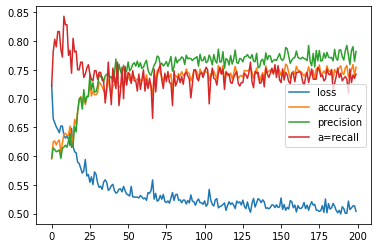

In [ ]:
pd.DataFrame(history.history).plot()


In [ ]:
y_pred= model.predict(x_test)



**Experiment in following ways**

1. Train-test split<br>

Model building....
2. Architecture-----> number of layers and number of neurons in each layer

compiling......
3. learning rate (lr)
4. optimizer (Adam/ SGD)

fit.....<br>
5.epochs

In [ ]:
import numpy as np
y_pred= y_pred<0.5
y_pred= y_pred.astype(int)
y_pred= pd.DataFrame(y_pred)

